### 🔍 Enhancing Model Performance: Leveraging Feature Engineering to Boost Accuracy

**Introduction:**

In the pursuit of achieving superior model performance, especially in predictive analytics, small improvements can lead to significant gains. Our objective is to elevate the baseline model's accuracy from an impressive **95%** to an even higher level by implementing targeted feature engineering techniques. Feature engineering—the process of creating new features or transforming existing ones—plays a crucial role in uncovering hidden patterns and enhancing the predictive power of machine learning models. This report details our approach to optimizing model accuracy through the strategic development of engineered features, using a diverse dataset encompassing production metrics, maintenance schedules, quality assessments, and more.

**Feature Engineering Approach:**

Our approach begins with a comprehensive analysis of the dataset, focusing on identifying opportunities for feature creation that could enrich the model's understanding of the underlying data. By examining variables related to production cost, maintenance hours, energy consumption, and workforce productivity, we engineered several new features designed to capture more nuanced relationships within the data. These features include ratios, efficiency metrics, and derived indicators, each aimed at providing deeper insights into the factors affecting defect rates.

**Model Training and Evaluation:**

Following the creation of engineered features, the model was retrained using these enhanced variables. We compared the performance of the updated model against the baseline, assessing improvements in accuracy, precision, recall, and other key metrics. The enhanced model's effectiveness was evaluated using various performance metrics, ensuring that the introduction of new features contributed to meaningful improvements.

**Results and Insights:**

The integration of engineered features resulted in a noticeable increase in model accuracy, improving from **95%** to **96%**. This gain highlights the value of feature engineering in refining predictive models and underscores the potential for further enhancements. Through careful feature selection and engineering, we were able to capture additional patterns and insights that were previously obscured, leading to a more accurate and robust predictive model.

**Conclusion:**

In summary, the application of feature engineering proved to be a powerful method for enhancing model accuracy. By thoughtfully crafting and incorporating new features, we achieved a significant improvement in performance, demonstrating the impact of feature engineering on predictive modeling. As we continue to explore and refine our approach, ongoing evaluation and optimization will be essential to maintaining and extending these gains. This process not only improves model efficacy but also provides a deeper understanding of the factors influencing defect rates, ultimately contributing to more reliable and actionable predictions in our analytical endeavors.


### Importing Libraries

In [57]:
# core packages for data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# ML implication packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# warnings
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv("manufacturing_defect_dataset.csv")
df.head()

ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
0               202    13175.403783        86.648534              1   
1               535    19770.046093        86.310664              4   
2               960    19060.820997        82.132472              0   
3               370     5647.606037        87.335966              5   
4               206     7472.222236        81.989893              3   

   DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
0    3.121492     63.463494                 9            0.052343   
1    0.819531     83.697818                20            4.908328   
2    4.514504     90.350550                 1            2.464923   
3    0.638524     67.628690                 8            4.692476   
4    3.867784     82.728334                 9            2.746726   

   InventoryTurnover  StockoutRate  WorkerProductivity  SafetyIncidents  \
0           8.630515      0.081322           85.042379                0   
1           9.296598      0.038486           99.657443                7   
2           5.097486      0.002887           92.819264                2   
3           3.577616      0.055331           96.887013                8   
4           6.851709      0.068047           88.315554                7   

   EnergyConsumption  EnergyEfficiency  AdditiveProcessTime  \
0        2419.616785          0.468947             5.551639   
1        3915.566713          0.119485             9.080754   
2        3392.385362          0.496392             6.562827   
3        4652.400275          0.183125             8.097496   
4        1581.630332          0.263507             6.406154   

   AdditiveMaterialCost  DefectStatus  
0            236.439301             1  
1            353.957631             1  
2            396.189402             1  
3            164.135870             1  
4            365.708964             1

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

### Variables Description

#### Production Metrics

| **Variable**        | **Description**                             | **Data Type** | **Range**               | **Significance** |
|---------------------|---------------------------------------------|---------------|-------------------------|------------------|
| **ProductionVolume**| Number of units produced per day.           | Integer        | 100 to 1000 units/day   | A higher production volume could potentially impact defect rates, as more <br> units mean more opportunities for defects. |
| **ProductionCost**  | Cost incurred for production per day.       | Float          | $5000 to $20000         | Higher production costs may reflect more sophisticated production techniques <br> or higher material costs, which could influence defect rates. |

#### Supply Chain and Logistics

| **Variable**        | **Description**                             | **Data Type** | **Range**               | **Significance** |
|---------------------|---------------------------------------------|---------------|-------------------------|------------------|
| **SupplierQuality** | Quality ratings of suppliers.               | Float (%)      | 80% to 100%             | Higher supplier quality typically means better materials,<br> which can lead to lower defect rates. |
| **DeliveryDelay**   | Average delay in delivery.                  | Integer        | 0 to 5 days             | Delays in delivery can impact the production schedule and potentially lead to increased defects<br> if materials are rushed or if there is a shortage. |

#### Quality Control and Defect Rates

| **Variable**        | **Description**                             | **Data Type** | **Range**               | **Significance** |
|---------------------|---------------------------------------------|---------------|-------------------------|------------------|
| **DefectRate**      | Defects per thousand units produced.        | Float          | 0.5 to 5.0 defects      | This is the primary measure of product quality.<br> A higher defect rate indicates poorer quality. |
| **QualityScore**    | Overall quality assessment.                 | Float (%)      | 60% to 100%             | A higher quality score reflects better overall product quality<br> and is usually inversely related to the defect rate. |

#### Maintenance and Downtime

| **Variable**        | **Description**                             | **Data Type** | **Range**               | **Significance** |
|---------------------|---------------------------------------------|---------------|-------------------------|------------------|
| **MaintenanceHours**| Hours spent on maintenance per week.        | Integer        | 0 to 24 hours           | Regular maintenance is crucial to ensure machinery operates correctly<br> and to prevent defects. |
| **DowntimePercentage** | Percentage of production downtime.       | Float (%)      | 0% to 5%                | Higher downtime can negatively affect production efficiency<br> and potentially lead to more defects. |

#### Inventory Management

| **Variable**        | **Description**                             | **Data Type** | **Range**               | **Significance** |
|---------------------|---------------------------------------------|---------------|-------------------------|------------------|
| **InventoryTurnover** | Ratio of inventory turnover.              | Float          | 2 to 10                 | A higher inventory turnover rate indicates efficient inventory management <br> and can reduce the risk of stock obsolescence and defects due to stale inventory. |
| **StockoutRate**    | Rate of inventory stockouts.                | Float (%)      | 0% to 10%               | A high stockout rate can disrupt production and potentially lead to defects <br> if the production process is forced to use suboptimal materials or methods. |

#### Workforce Productivity and Safety

| **Variable**        | **Description**                             | **Data Type** | **Range**               | **Significance** |
|---------------------|---------------------------------------------|---------------|-------------------------|------------------|
| **WorkerProductivity** | Productivity level of the workforce.     | Float (%)      | 80% to 100%             | Higher productivity typically indicates a more efficient workforce,<br> which can positively impact defect rates. |
| **SafetyIncidents** | Number of safety incidents per month.       | Integer        | 0 to 10 incidents       | A higher number of safety incidents can indicate poor working conditions,<br> which can impact worker morale and potentially affect product quality. |

#### Energy Consumption and Efficiency

| **Variable**        | **Description**                             | **Data Type** | **Range**               | **Significance** |
|---------------------|---------------------------------------------|---------------|-------------------------|------------------|
| **EnergyConsumption** | Energy consumed in kWh.                  | Float          | 1000 to 5000 kWh        | Energy consumption can impact production costs and efficiency.<br> Efficient energy use can contribute to lower production costs and potentially fewer defects. |
| **EnergyEfficiency** | Efficiency factor of energy usage.         | Float          | 0.1 to 0.5              | Higher energy efficiency indicates that less energy is wasted,<br> which can contribute to better overall production efficiency and lower defect rates. |

#### Additive Manufacturing

| **Variable**        | **Description**                             | **Data Type** | **Range**               | **Significance** |
|---------------------|---------------------------------------------|---------------|-------------------------|------------------|
| **AdditiveProcessTime** | Time taken for additive manufacturing.  | Float (hours)  | 1 to 10 hours           | The duration of the additive manufacturing process can impact overall production efficiency<br> and the potential for defects. |
| **AdditiveMaterialCost** | Cost of additive materials per unit.    | Float ($)      | $100 to $500            | The cost of materials can impact the overall production cost<br> and may influence decisions about process improvements to reduce defects. |

#### Target Variable

| **Variable**        | **Description**                             | **Data Type** | **Range**               | **Significance** |
|---------------------|---------------------------------------------|---------------|-------------------------|------------------|
| **DefectStatus**    | Predicted defect status.                    | Binary         | 0 for Low Defects, 1 for High Defects | This is the variable to predict based on the other metrics in the dataset.<br> It indicates the low level or high level of the defect rates in production. |


### Data Preprocessing

In [60]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

duplicates_data = [["Number of duplicate rows", num_duplicates]]

print(tabulate(duplicates_data, headers=["Metric", "Count"], tablefmt="pretty"))

+--------------------------+-------+
|          Metric          | Count |
+--------------------------+-------+
| Number of duplicate rows |   0   |
+--------------------------+-------+


In [61]:
null_counts = df.isnull().sum()

null_counts_data = [["Column", "Null Values"]]
for column, count in null_counts.items():
    null_counts_data.append([column, count])

print(tabulate(null_counts_data, headers="firstrow", tablefmt="pretty"))

+----------------------+-------------+
|        Column        | Null Values |
+----------------------+-------------+
|   ProductionVolume   |      0      |
|    ProductionCost    |      0      |
|   SupplierQuality    |      0      |
|    DeliveryDelay     |      0      |
|      DefectRate      |      0      |
|     QualityScore     |      0      |
|   MaintenanceHours   |      0      |
|  DowntimePercentage  |      0      |
|  InventoryTurnover   |      0      |
|     StockoutRate     |      0      |
|  WorkerProductivity  |      0      |
|   SafetyIncidents    |      0      |
|  EnergyConsumption   |      0      |
|   EnergyEfficiency   |      0      |
| AdditiveProcessTime  |      0      |
| AdditiveMaterialCost |      0      |
|     DefectStatus     |      0      |
+----------------------+-------------+


### Exploratory Data Analysis

Defect counts:
+---+---------------+-------+
|   | Defect Status | Count |
+---+---------------+-------+
| 0 | high defects  | 2723  |
| 1 |  low defects  |  517  |
+---+---------------+-------+


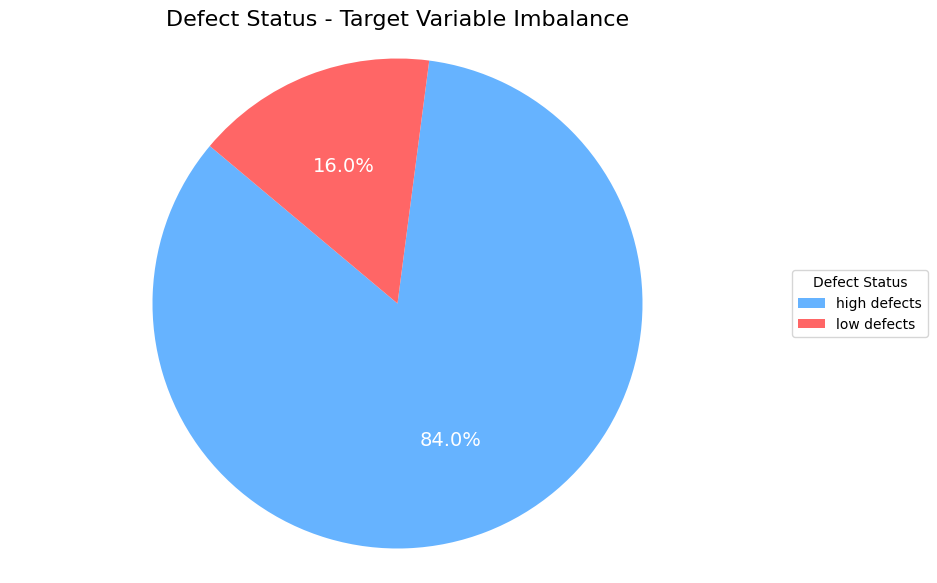

In [62]:
defect_counts = df['DefectStatus'].value_counts()

custom_labels = {0: 'low defects', 1: 'high defects'}

defect_counts_df = pd.DataFrame({
    'Defect Status': [custom_labels[i] for i in defect_counts.index],
    'Count': defect_counts.values
})

print("Defect counts:")
print(tabulate(defect_counts_df, headers='keys', tablefmt='pretty'))

colors = ['#66b3ff', '#ff6666']  

plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(
    defect_counts,
    labels=[custom_labels[i] for i in defect_counts.index],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color="w")
)

for text in texts + autotexts:
    text.set_fontsize(14)  

plt.title('Defect Status - Target Variable Imbalance', fontsize=16)

plt.legend(
    wedges,
    [custom_labels[i] for i in defect_counts.index],
    title="Defect Status",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.axis('equal')
plt.show()

### Feature Engineering

In [63]:
df['CostPerUnit'] = df['ProductionCost'] / df['ProductionVolume']
df['MaintenancePerUnit'] = df['MaintenanceHours'] / df['ProductionVolume']

# Aggregated Metrics
df['QualityDefectRatio'] = df['QualityScore'] / df['DefectRate']
df['TotalProductionCost'] = df['ProductionCost'] + (df['AdditiveMaterialCost'] * df['ProductionVolume'])

# Ratios and Percentages
df['MaintenanceEfficiency'] = df['MaintenanceHours'] / (df['ProductionVolume'] * df['EnergyConsumption'])
df['ProductivityDefectRatio'] = df['WorkerProductivity'] / df['DefectRate']

# Derived Metrics
df['DefectRatePerEnergyUnit'] = df['DefectRate'] / df['EnergyConsumption']

# Additive Manufacturing Efficiency
df['AdditiveEfficiency'] = df['AdditiveProcessTime'] / df['AdditiveMaterialCost']

# Safety and Productivity
df['IncidentsPerWorker'] = df['SafetyIncidents'] / df['WorkerProductivity']

# Downtime Impact
df['DowntimeImpact'] = df['DowntimePercentage'] * df['ProductionVolume']

# Inventory Management
df['EffectiveInventoryTurnover'] = df['InventoryTurnover'] * (1 - df['StockoutRate'])

# Supply Chain Efficiency
df['SupplierEfficiency'] = df['SupplierQuality'] / (1 + df['DeliveryDelay'])

# Categorical Encodings
df['HighQuality'] = (df['QualityScore'] > 90).astype(int)
df['HighDefectRate'] = (df['DefectRate'] > 2.5).astype(int)

#### Engineered Features

| **Variable**             | **Description**                                     | **Data Type** | **Calculation**                                                                 | **Significance** |
|--------------------------|-----------------------------------------------------|---------------|--------------------------------------------------------------------------------|------------------|
| **CostPerUnit**          | Production cost per unit produced.                  | Float         | `ProductionCost / ProductionVolume`                                            | This metric helps understand the cost efficiency of production. Lower costs per unit indicate better efficiency and potential impact on defect rates. |
| **MaintenancePerUnit**   | Maintenance hours per unit produced.                | Float         | `MaintenanceHours / ProductionVolume`                                          | Higher maintenance per unit might be indicas on the production issues or aging machinery, which could influence defect rates. |
| **QualityDefectRatio**   | Ratio of quality score to defect rate.              | Float         | `QualityScore / DefectRate`                                                    | This ratio provides insight into the effectiveness of quality control measures. Higher values suggest better quality management relative to defects. |
| **TotalProductionCost**  | Total production cost including additive materials. | Float         | `ProductionCost + (AdditiveMaterialCost * ProductionVolume)`                   | Captures the complete cost picture, accounting for both traditional and additive manufacturing, which affect overall production quality and defect rates. |
| **MaintenanceEfficiency**| Efficiency of maintenance efforts.                  | Float         | `MaintenanceHours / (ProductionVolume * EnergyConsumption)`                    | This metric measures how effectively maintenance activities are supporting production. Higher efficiency suggests better maintenance practices, potentially leading to fewer defects. |
| **ProductivityDefectRatio** | Ratio of worker productivity to defect rate.      | Float         | `WorkerProductivity / DefectRate`                                              | Helps understand the relationship between workforce productivity and defect occurrence. Higher ratios suggest better productivity management and lower defect rates. |
| **DefectRatePerEnergyUnit** | Defect rate per unit of energy consumed.         | Float         | `DefectRate / EnergyConsumption`                                               | This metric indicates the energy efficiency in relation to defects produced. Lower values suggest more efficient energy use with fewer defects. |
| **HighQuality**          | Indicator of high quality score.                    | Binary        | `1 if QualityScore > 90 else 0`                                                | Helps classify instances with high quality scores, which can be used to identify patterns associated with better quality. |
| **HighDefectRate**       | Indicator of high defect rate.                      | Binary        | `1 if DefectRate > 2.5 else 0`                                                 | This metric helps classify instances with high defect rates, which can be used to identify patterns associated with higher defects. |
| **AdditiveEfficiency**   | Efficiency of additive manufacturing.               | Float         | `AdditiveProcessTime / AdditiveMaterialCost`                      | This metric assesses the cost-effectiveness of the additive manufacturing process. Higher efficiency can lead to lower production costs and fewer defects. |
| **IncidentsPerWorker**   | Safety incidents per worker productivity.           | Float         | `SafetyIncidents / WorkerProductivity`                            | This feature helps understand the relationship between safety and productivity. Higher incidents per worker can indicate potential safety issues affecting productivity. |
| **DowntimeImpact**       | Impact of downtime on production volume.            | Float         | `DowntimePercentage * ProductionVolume`                           | This feature captures the effect of downtime on overall production. Higher downtime impact can lead to reduced production efficiency and increased defect rates. |
| **EffectiveInventoryTurnover** | Adjusted inventory turnover considering stockout rate. | Float         | `InventoryTurnover * (1 - StockoutRate)`                          | This metric provides a more accurate measure of inventory turnover by accounting for stockouts, which can affect production continuity and defect rates. |
| **SupplierEfficiency**   | Supplier quality adjusted by delivery delay.        | Float         | `SupplierQuality / (1 + DeliveryDelay)`                           | This feature measures supplier efficiency by considering both quality and delivery performance. Higher supplier efficiency can lead to better production quality and lower defect rates. |


In [66]:
columns_to_drop = [
    'ProductionVolume',
    'ProductionCost',
    'SupplierQuality',
    'DeliveryDelay',
    'DefectRate',
    'QualityScore',
    'MaintenanceHours',
    'DowntimePercentage',
    'InventoryTurnover',
    'StockoutRate',
    'WorkerProductivity',
    'SafetyIncidents',
    'EnergyConsumption',
    'EnergyEfficiency',
    'AdditiveProcessTime',
    'AdditiveMaterialCost'
]
filtered_df = df.drop(columns_to_drop, axis=1)
filtered_df.head()

DefectStatus  CostPerUnit  MaintenancePerUnit  QualityDefectRatio  \
0             1    65.224771            0.044554           20.331139   
1             1    36.953357            0.037383          102.128983   
2             1    19.855022            0.001042           20.013394   
3             1    15.263800            0.021622          105.914099   
4             1    36.272923            0.043689           21.389080   

   TotalProductionCost  MaintenanceEfficiency  ProductivityDefectRatio  \
0         60936.142579           1.841385e-05                27.244142   
1        209137.378769           9.547322e-06               121.603091   
2        399402.646993           3.070602e-07                20.560235   
3         66377.877913           4.647412e-06               151.735909   
4         82808.268728           2.762297e-05                22.833634   

   DefectRatePerEnergyUnit  AdditiveEfficiency  IncidentsPerWorker  \
0                 0.001290            0.023480            0.000000   
1                 0.000209            0.025655            0.070241   
2                 0.001331            0.016565            0.021547   
3                 0.000137            0.049334            0.082570   
4                 0.002445            0.017517            0.079261   

   DowntimeImpact  EffectiveInventoryTurnover  SupplierEfficiency  \
0       10.573259                    7.928667           43.324267   
1     2625.955614                    8.938805           17.262133   
2     2366.325878                    5.082767           82.132472   
3     1736.216043                    3.379663           14.555994   
4      565.825591                    6.385470           20.497473   

   HighQuality  HighDefectRate  
0            0               1  
1            0               0  
2            1               1  
3            0               0  
4            0               1

#### Distribution & Relation Between Variables

##### Histogram:

- **Purpose**: To understand the distribution of each numerical variable.
- **What to Check**: Check for skewness, central tendency, spread, and potential outliers.

##### Pairwise Scatter Plot:

- **Purpose**: To visualize pairwise relationships between numerical variables and their distributions.
- **What to Check**: Examine relationships between pairs of variables. Look for patterns, trends, or correlations. Identify any unusual clusters or outliers.

These visuals plot helps in understanding how different numerical variables relate to each other and provides insight into their individual distributions.<br> This comprehensive view is crucial for identifying any patterns or anomalies in the data that may influence defect rates or other key metrics.


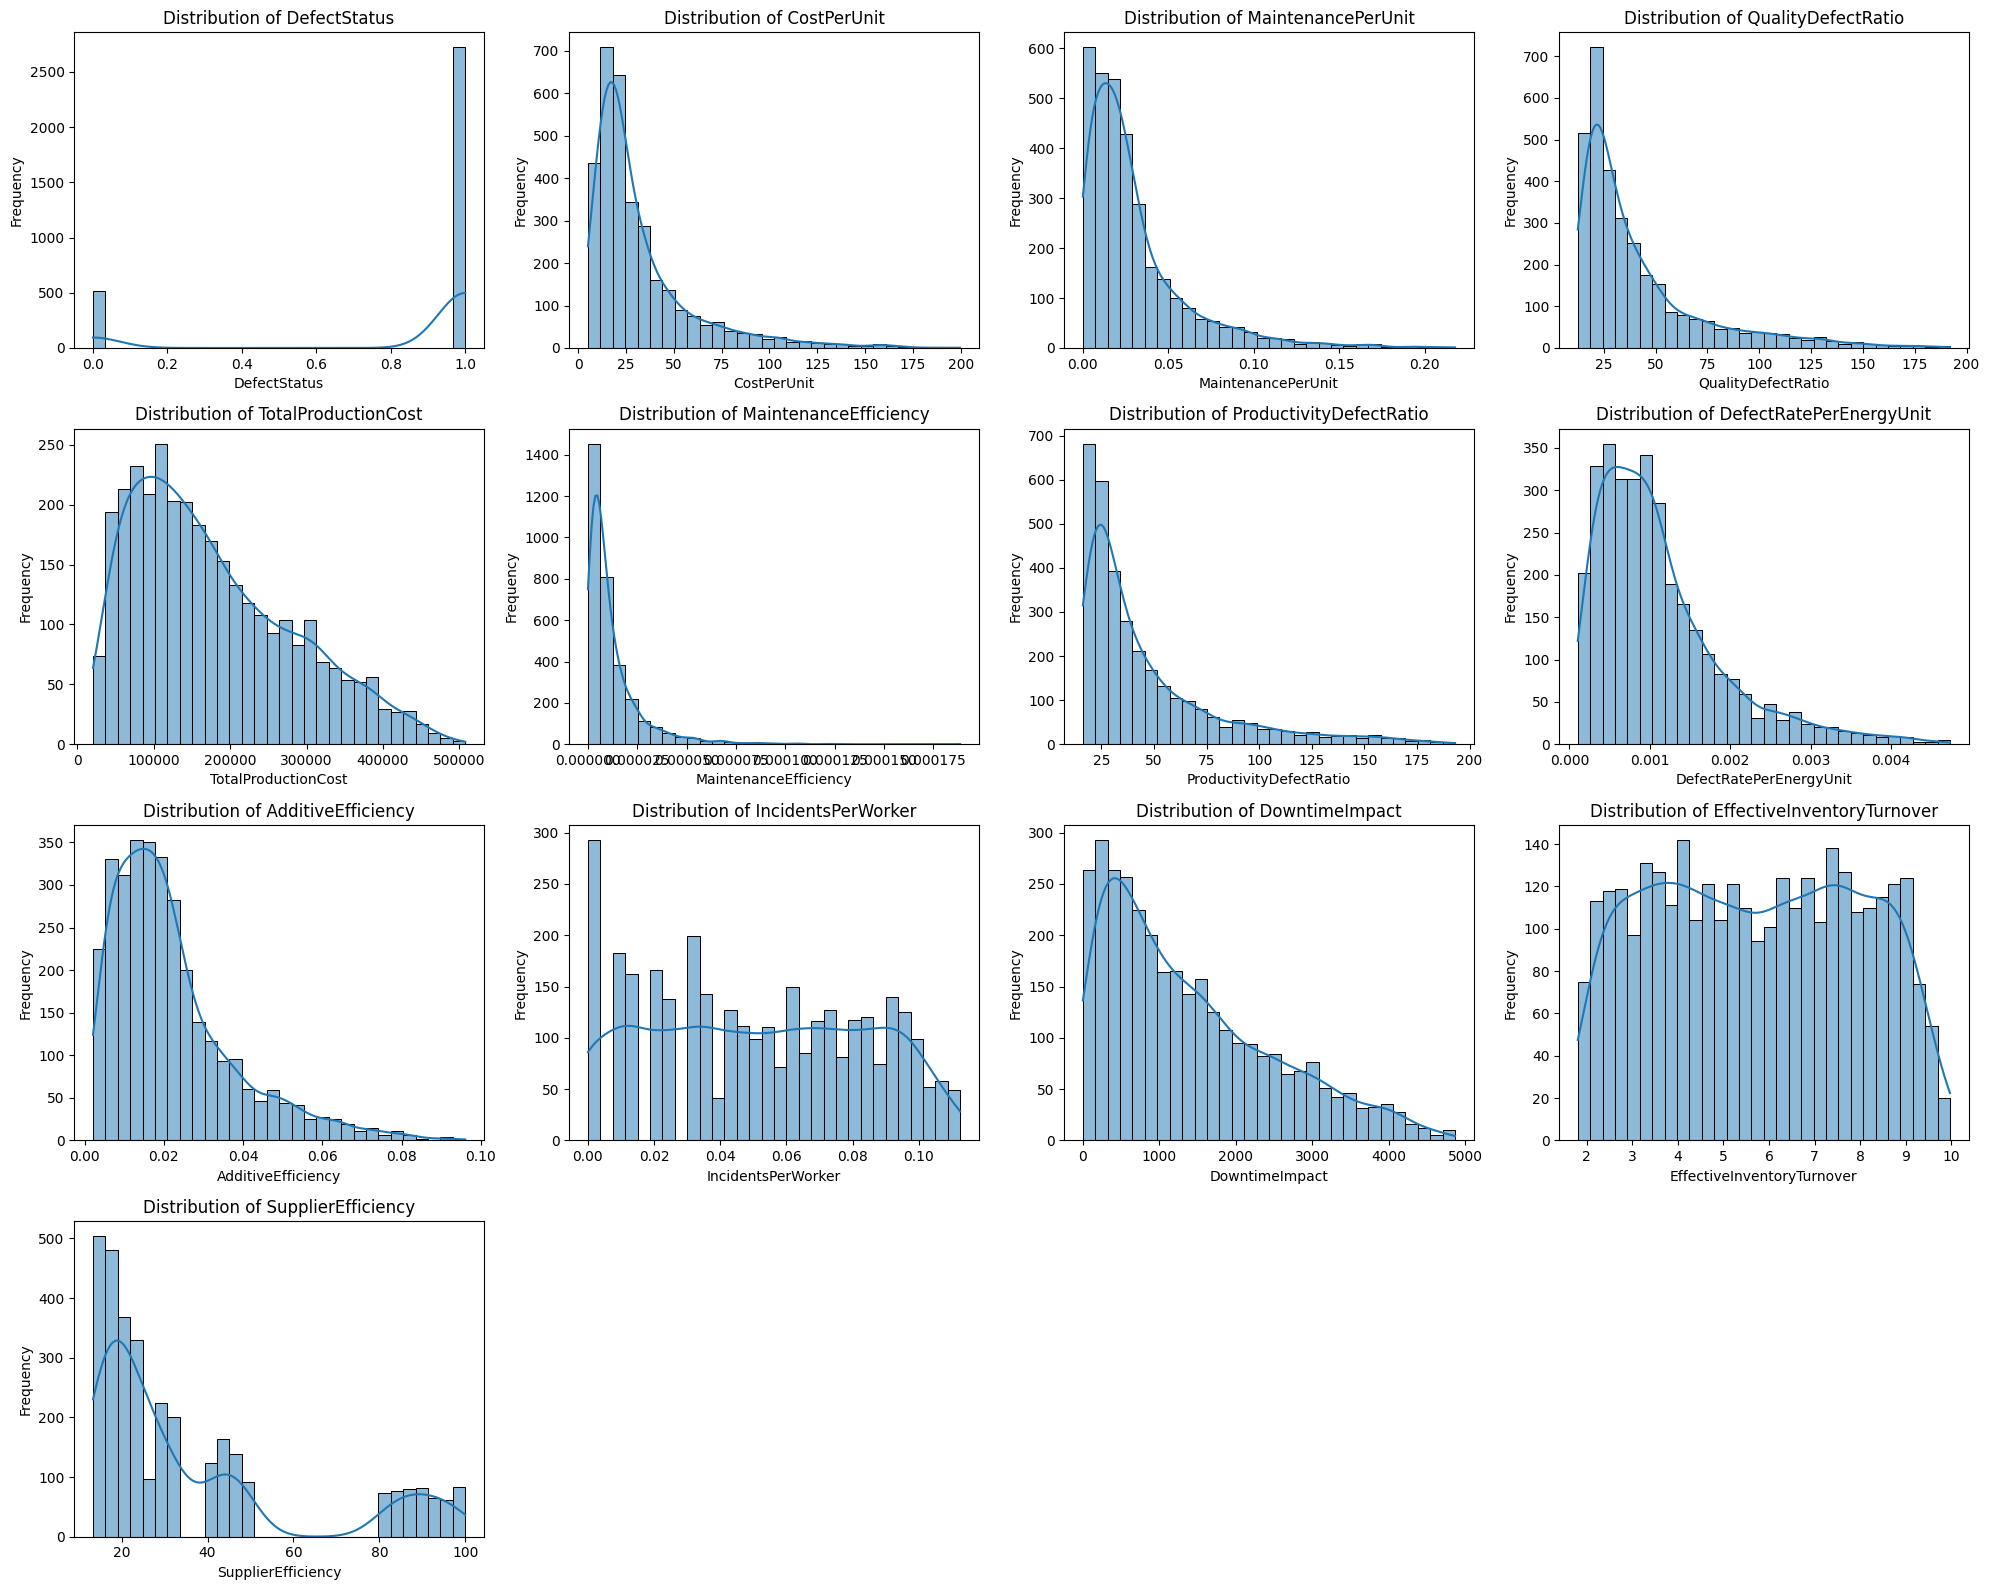

In [67]:
# Histogram
numerical_cols = filtered_df.select_dtypes(include=['float64', 'int64']).columns

num_cols = len(numerical_cols)
nrows = int(np.ceil(num_cols / 4))
ncols = min(num_cols, 4)  # Keep the number of columns up to 4

# Create histograms for each numerical column
plt.figure(figsize=(ncols * 5, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, ncols, i + 1)
    sns.histplot(filtered_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

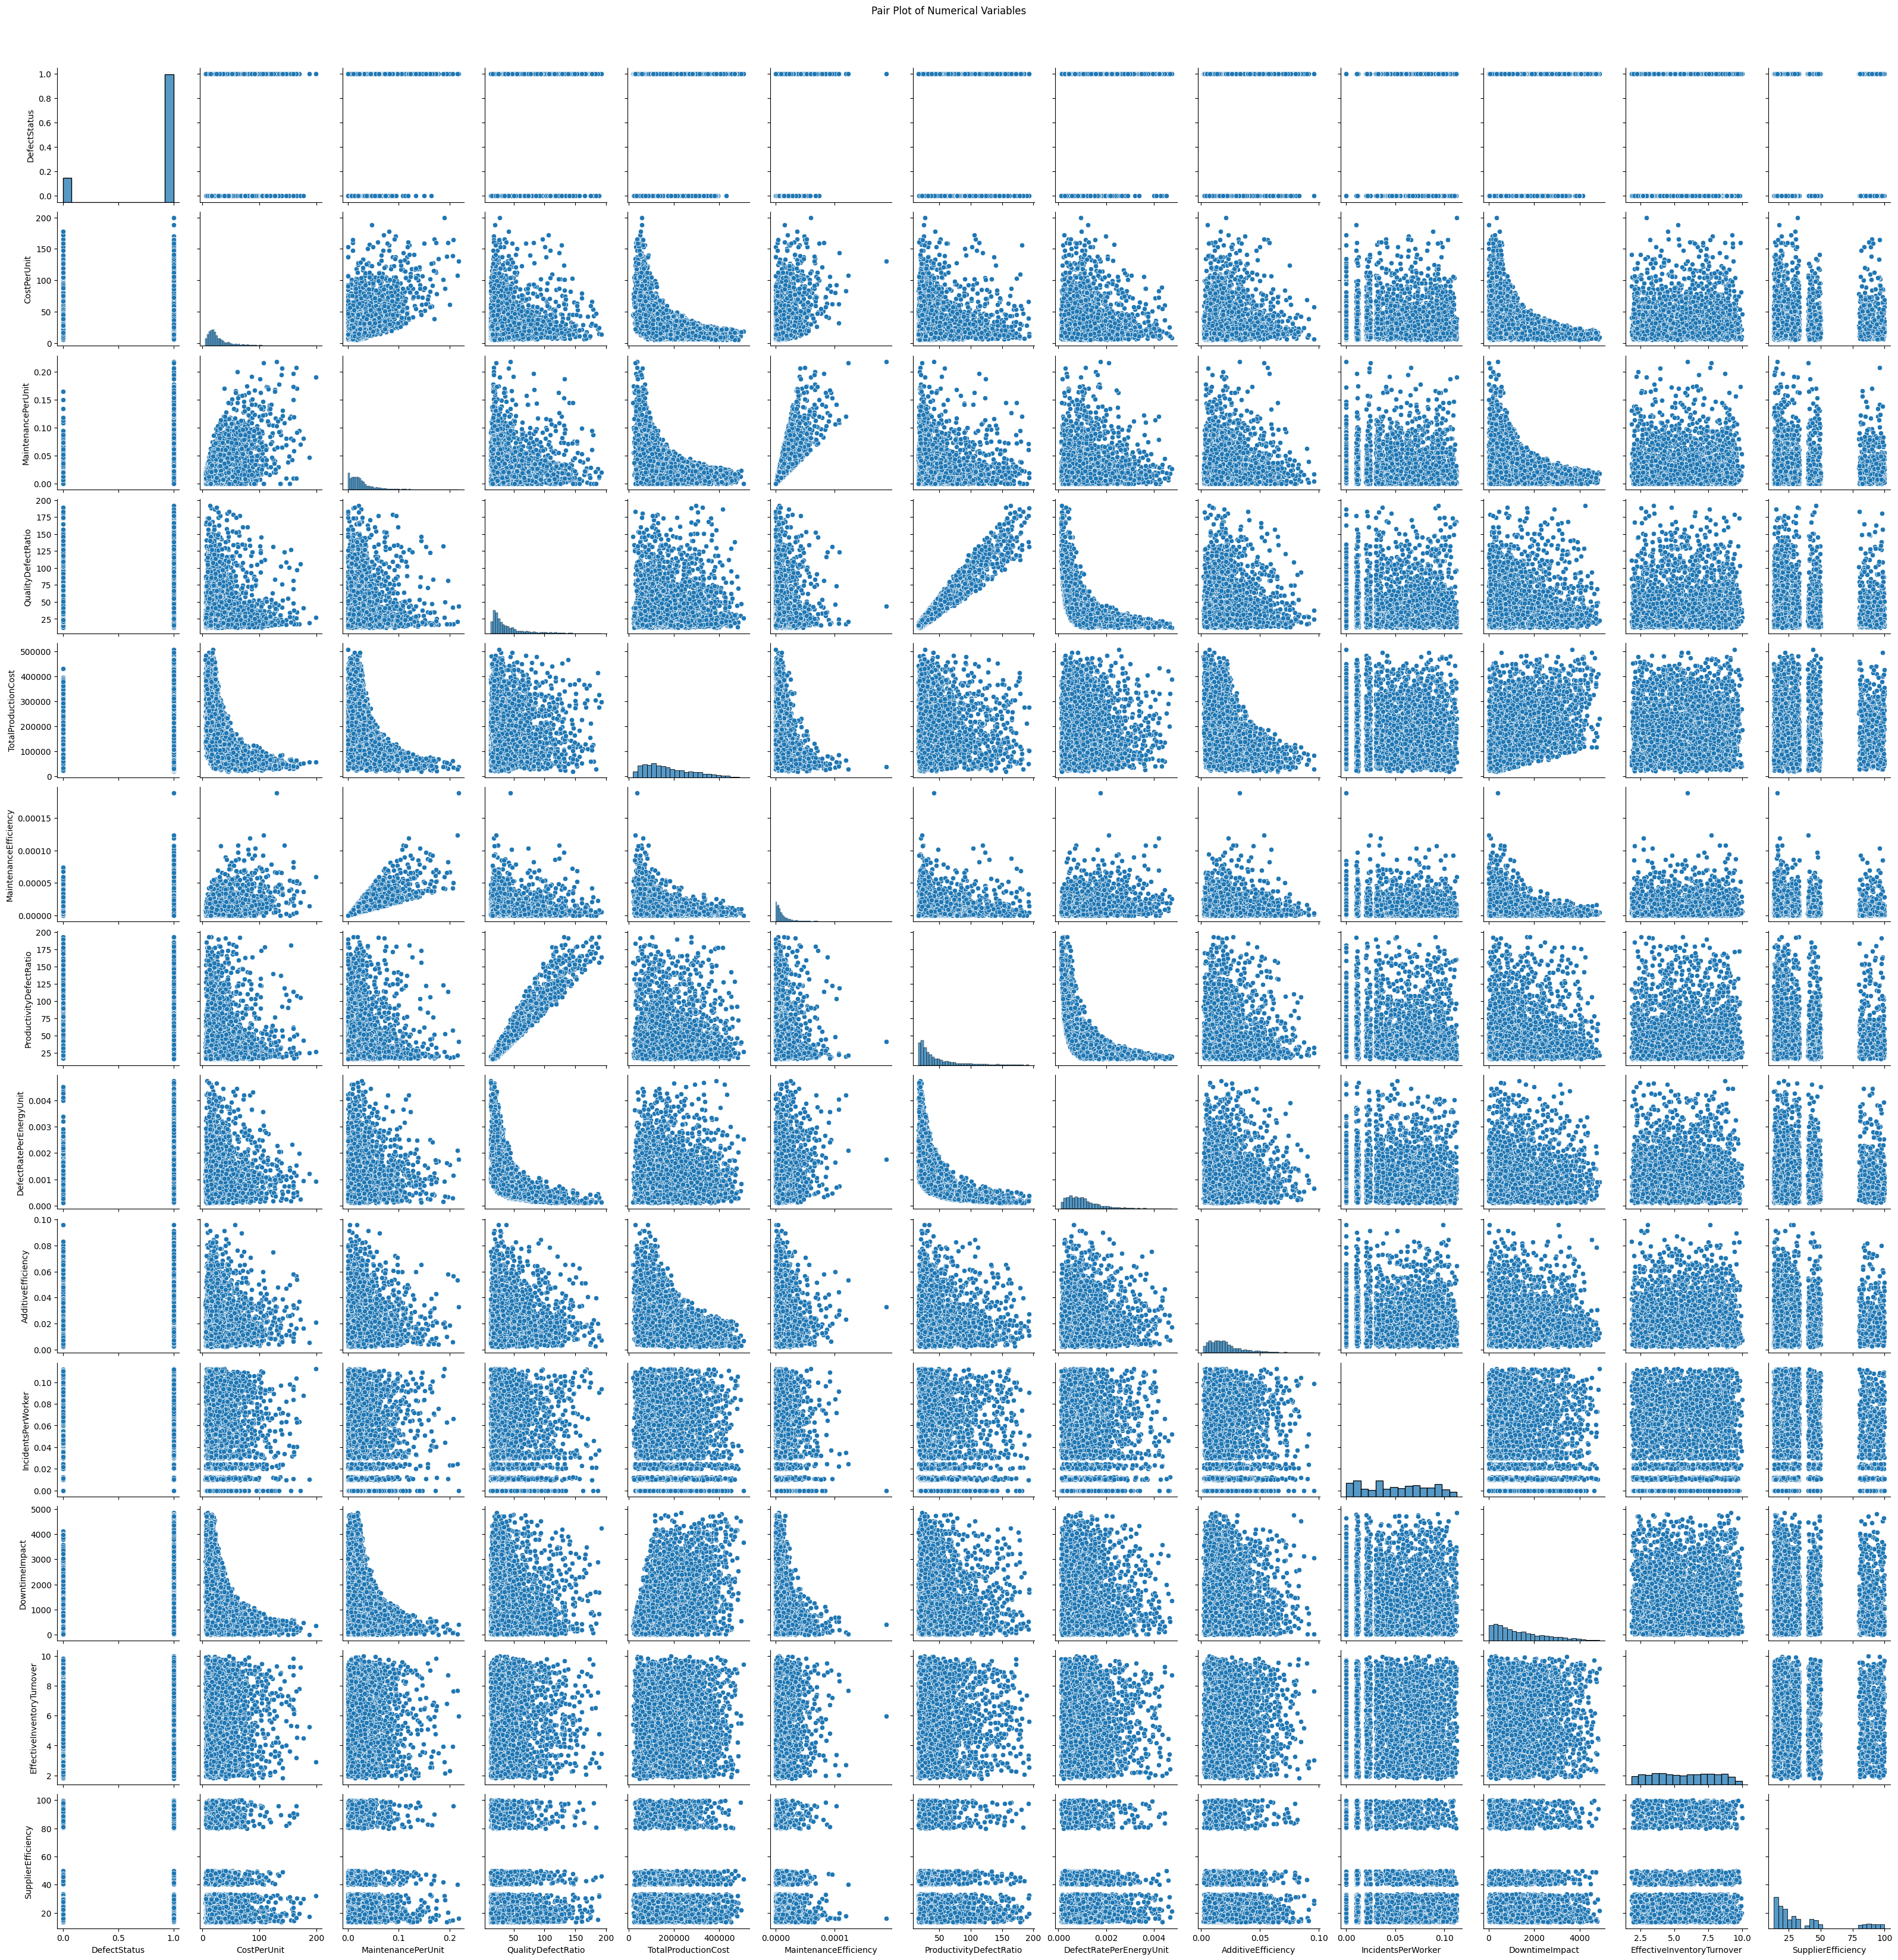

In [68]:
# Pairwise Scatter Plot after the filter for comparison
sns.pairplot(filtered_df[numerical_cols], diag_kind='hist')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

In [69]:
# Apply the filter
df = df[df['MaintenanceEfficiency'] < 0.00010]
df = df[df['MaintenancePerUnit'] < 0.178]
df = df[df['CostPerUnit'] < 100]
df = df[df['QualityDefectRatio'] < 150]
df = df[df['AdditiveEfficiency'] < 0.07]
df = df[df['DowntimeImpact'] < 4300]

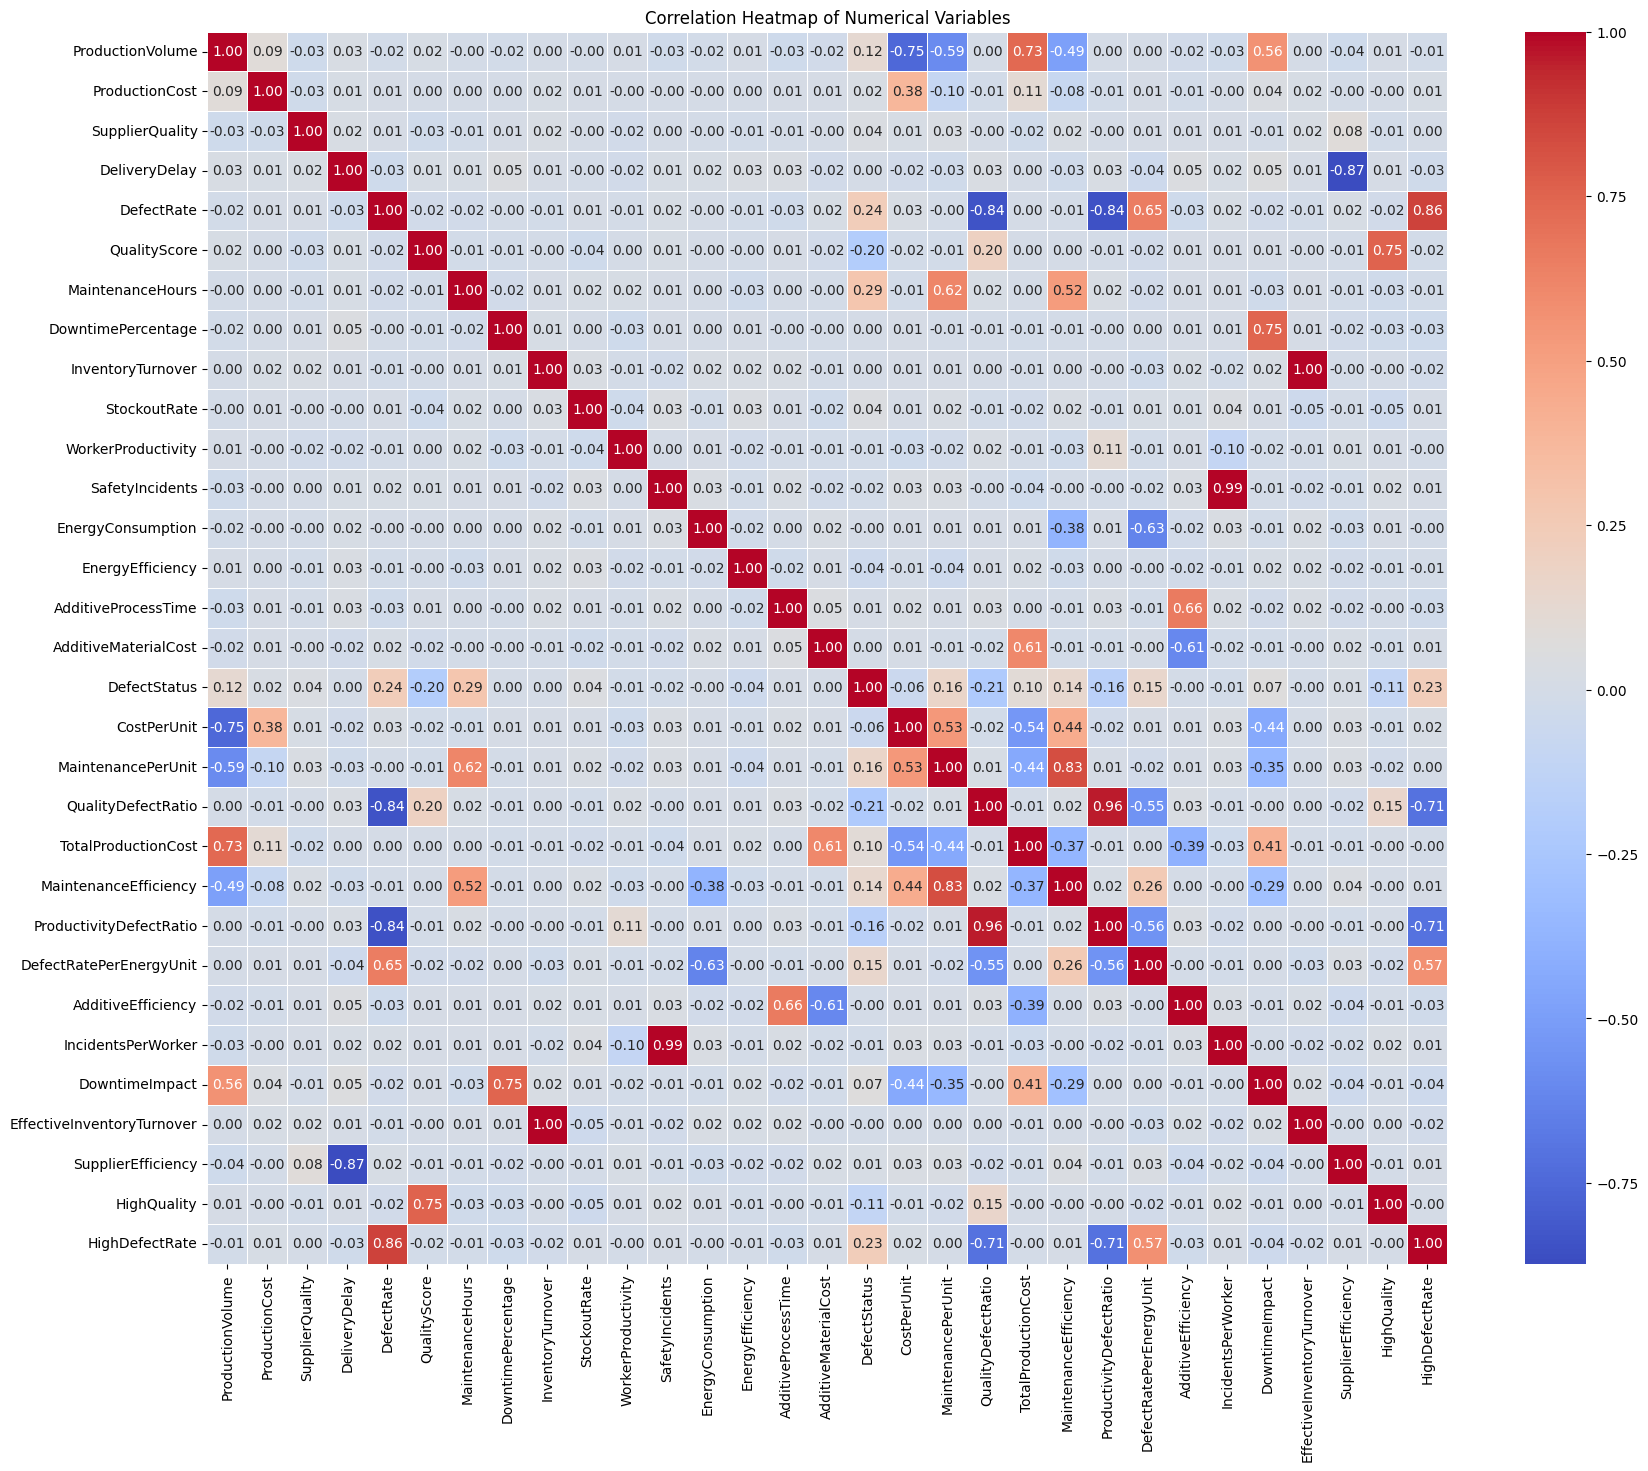

In [70]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 16))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### Traning Data Preparation

In [71]:
X = df.drop('DefectStatus', axis=1)
y = df['DefectStatus']

# Use chi-squared test to select top features
best_features = SelectKBest(score_func=chi2, k=10)
X_best = best_features.fit_transform(X, y)

In [73]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)

In [74]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling imbalanced data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

#### Model Selection & Evaluation

In [75]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9681742043551089
Confusion Matrix:
[[ 72  15]
 [  4 506]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        87
           1       0.97      0.99      0.98       510

    accuracy                           0.97       597
   macro avg       0.96      0.91      0.93       597
weighted avg       0.97      0.97      0.97       597



### Results and Analysis

#### 🎯 Baseline Model Performance
- **Accuracy**: **95%**

#### 🚀 Enhanced Model with Feature Engineering
- **Accuracy**: **96%**

#### ✅ Advantages of Feature Engineering

- 📈 Enhanced Predictive Power
    - **Improvement**: The feature engineering process improved the model’s accuracy from **95%** to **96%**. This suggests that the engineered features captured additional relevant information that enhanced the model's predictive power.

- 🧩 Better Representation of Data
    - **Insight**: Engineering features tailored to the specific context of the dataset helped in revealing hidden patterns that were not apparent with the raw features alone. This better representation of the data can lead to more accurate predictions.

- 🔍 Increased Model Interpretability
    - **Interpretation**: Engineered features often provide more meaningful insights into the data. This can make it easier to understand the factors influencing the model's predictions, aiding in domain-specific decision-making.

#### ⚠️  Disadvantages of Feature Engineering

- **Complexity**: The process of creating and selecting engineered features can be complex and time-consuming. It requires a deep understanding of both the data and domain to ensure the features are relevant and useful.
- **Risk of Overfitting**: Introducing numerous engineered features can increase the risk of overfitting, especially if the features are highly correlated or if there are too many compared to the amount of data.
- **Loss of Original Data**: If not handled carefully, feature engineering might lead to the exclusion of potentially useful original features. This could result in the loss of valuable information that could have improved the model.

##### 🔧 Limitations

- **Data Dependency**: The effectiveness of feature engineering is highly dependent on the specific dataset and domain. What works well for one dataset might not necessarily work for another.
- **Computational Resources**: The process of engineering features and validating their impact can be resource-intensive, requiring additional computational power and time.
- **Overfitting Risk**: While the engineered features improved the model's accuracy in this instance, there is always a risk of overfitting. Regular evaluation and validation are necessary to ensure that improvements in accuracy are genuine and not due to chance.

#### 🏆 Conclusion

The implementation of feature engineering resulted in a notable improvement in model accuracy from **95%** to **96%**. This enhancement underscores the potential benefits of feature engineering in improving model performance by capturing additional relevant patterns in the data.

**In summary**, feature engineering is a powerful technique for improving model performance, but it must be applied thoughtfully. The gains in accuracy observed demonstrate its effectiveness, but ongoing evaluation and validation are critical to ensure that the model remains robust and generalizable.
